In [1]:
import numpy as np

# A function to solve the wave equations, given the initial and boundary conditions.
def wave_equation_solver(length, time, c, initial_condition, boundary_conditions, nx, nt):
    """
    Solves the wave equation with given initial and boundary.
    
    Parameters:
    - length: length of the spatial domain
    - time: final time
    - c: wave speed
    - nx: spatial grid spacing
    - nt: temporal grid spacing
    - initial_condition: initial condition
    - boundary_conditions: boundary_conditions
    
    Returns:
    - u: solution
    """
    
    dx = length / (nx - 1)
    dt = time / nt
    r = c * dt / dx

    # Initialize the grid
    u = np.zeros((nt, nx))
    
    # Set initial condition
    u[0, :] = initial_condition(np.linspace(0, length, nx))

    # Set boundary conditions
    u[:, 0] = boundary_conditions[0](np.linspace(0, time, nt))
    u[:, -1] = boundary_conditions[1](np.linspace(0, time, nt))

    # Time-stepping loop
    for t in range(1, nt):
        for x in range(1, nx - 1):
            if t == 1:
                # Special case for the first time step
                u[t, x] = u[t-1, x] + 0.5 * r**2 * (u[t-1, x-1] - 2*u[t-1, x] + u[t-1, x+1])
            else:
                # Finite difference scheme
                u[t, x] = 2*(1 - r**2) * u[t-1, x] + r**2 * (u[t-1, x-1] + u[t-1, x+1]) - u[t-2, x]

    return u

In [2]:
# Example

# Define the initial and boundary conditions
def initial_condition(x):
    return np.sin(np.pi * x)

def left_boundary_condition(t):
    return 0

def right_boundary_condition(t):
    return 0

# Set parameters
length = 1.0
time = 2.0
c = 1.0
nx = 101
nt = 201

# Call the wave equation solver
solution = wave_equation_solver(length, time, c, initial_condition, (left_boundary_condition, right_boundary_condition), nx, nt)

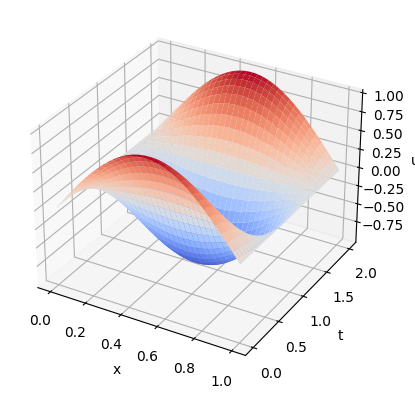

In [3]:
# 3D Plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of (t, x) values
t = np.linspace(0, time, nt)
x = np.linspace(0, length, nx)
T, X = np.meshgrid(t, x)

# Transpose the solution array before plotting
U = np.transpose(solution)

# Plot the solution as a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

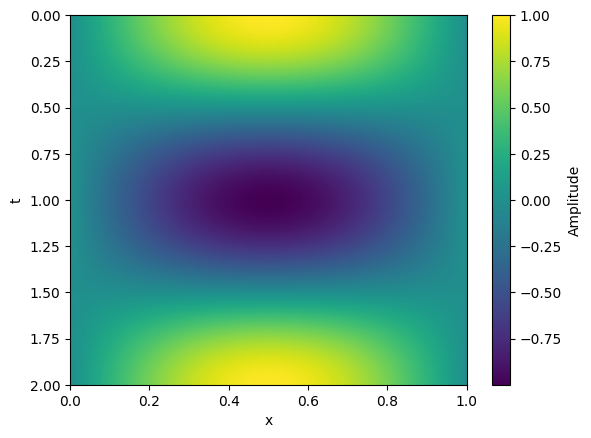

In [4]:
# Heatmap Plot
plt.imshow(solution, extent=[0, length, time, 0], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(label='Amplitude')
plt.show()

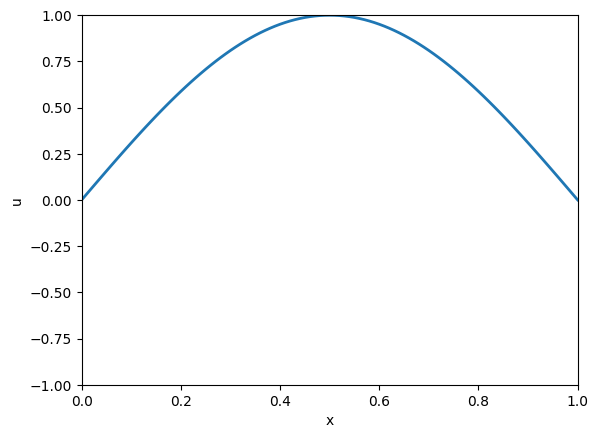

In [5]:
# Animation

from IPython.display import HTML
import matplotlib.animation as animation
# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(0, length)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('u')
line, = ax.plot([], [], lw=2)

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(t):
    x = np.linspace(0, length, nx)
    y = solution[t, :]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(0, nt, 5), init_func=init, blit=True)

# Save the animation as an animated GIF
ani.save('wave_animation.gif', writer='pillow', fps=15)
plt.show()